In [1]:
import sys
import os
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
import psutil
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import patches
from matplotlib import cm

from metpy import calc as mpcalc
from metpy.units import units

In [2]:
warnings.filterwarnings('ignore')

In [3]:
os.chdir('/data2/willytsai/python_module/')
import SCAI_calc4obj as scai 

In [17]:
TRMM_dir = '/data2/willytsai/TRMM_3hr/TRMM/2009_2018'
MERRA2_dir = '/data2/willytsai/MERRA2/'
Gridsat_dir = '/data/willytsai/gridsat_BT/remap_0.25deg/'

In [18]:
os.chdir(TRMM_dir)
files_TRMM = sorted(glob('*2014*.nc4')+glob('*2015*.nc4')+glob('*2016*.nc4')+
                    glob('*2017*.nc4')+glob('*2018*.nc4'))
files_CWV = sorted(glob(MERRA2_dir+'inst_2d_hourly/'+'*.nc'))
files_BT = sorted(glob(Gridsat_dir+'2014_2018/'+'*.nc'))

In [20]:
data = xr.open_dataset(files_TRMM[12616])
prec = data.precipitation
data2 = xr.open_dataset(files_CWV[1577])
cwv = data2.TQV
data3 = xr.open_dataset(files_BT[12616])
bt = data3.irwin_cdr

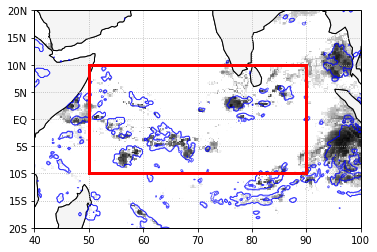

In [24]:
fig = plt.figure(figsize=(12,4))

latp = prec.nlat; lonp = prec.nlon
latc = cwv.lat; lonc = cwv.lon
latb = bt.lat; lonb = bt.lon

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
ax.coastlines()
ax.add_feature(cfeat.LAND,zorder=1,edgecolor='k',facecolor='whitesmoke') # maskout LAND

cf = plt.pcolor(lonb,latb,bt,transform=ccrs.PlateCarree(),cmap='binary_r',vmax=280)
plt.contour(lonp,latp,24*prec.T,transform=ccrs.PlateCarree(),levels=[5,10],colors=['blue'],
           linewidths=0.8,alpha=0.7)
#plt.contour(lonc,latc,cwv[0,:,:],transform=ccrs.PlateCarree(),lev=[48],colors=['g'],
#           linewiths=0.4)

ax.set_yticks([-20,-15,-10,-5,0,5,10,15,20])
ax.set_yticklabels(['20S','15S','10S','5S','EQ','5N','10N','15N','20N'])
ax.set_xticks([40,50,60,70,80,90,100])
#ax.set_xticklabels(['0','60E','120E','180','120W','60W','0'])
ax.set_ylim([-20,20]);ax.grid(linestyle=':')
ax.set_xlim([40,100])

rect1 = patches.Rectangle((50,-10),40,20,linewidth=3,zorder=2,
                              edgecolor='red',facecolor='None')
ax.add_patch(rect1)
# rect2 = patches.Rectangle((-30,-10),30,20,linewidth=2,zorder=2,
#                               edgecolor='g',facecolor='None')
# ax.add_patch(rect2)
# rect3 = patches.Rectangle((0,-10),90,20,linewidth=2,zorder=2,
#                               edgecolor='r',facecolor='None')
# ax.add_patch(rect3)

#plt.title('TRMM3B42/GridSAT, BT<280K, PREC>5mm/d, 2018-04-27')
#fig.savefig('/data/willytsai/ISCCP/fig/TRMMGridsat_domain.pdf',bbox_inches='tight')

In [25]:
fig.savefig('/data/willytsai/ISCCP/fig/TRMMGridsat_domain.pdf',bbox_inches='tight')